# Lambda-Kaggle Tanzania Waterpoints Challenge

My initial imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Create DataFrames

In [3]:
df_train = pd.read_csv('train_features.csv')
df_test = pd.read_csv('test_features.csv')

In [4]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
print(df_train.shape)
print(df_test.shape)

(59400, 40)
(14358, 40)


### Putting together both the training and test set so I can preprocess them, and then split them out later 
### using the below method of adding a training-set column to both DataFrames with True/False to tell them apart

In [7]:

df_train['training_set'] = True
df_test['training_set'] = False

In [8]:
df_full = pd.concat([df_train, df_test])
df_full.shape

(73758, 41)

In [9]:
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True


### First thing we're going to do is create an age variable by:
1. changing ```date_recorded``` to datetime variable
2. extracting just the year
3. subtracting ```construction_year``` from ```year_recorded```

In [10]:
df_full['date_recorded'] = pd.to_datetime(df_full['date_recorded'])
df_full.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [11]:
df_full['date_recorded'] = df_full['date_recorded'].dt.year
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True


In [12]:
df_full['construction_year'] = df_full['construction_year'].replace(0, 1986)
df_full['construction_year'].value_counts(normalize=True)

1986    0.356382
2010    0.044660
2008    0.043792
2009    0.043100
2000    0.034762
2007    0.026343
2006    0.025529
2011    0.021340
2003    0.021272
2004    0.019022
2002    0.018154
2012    0.018018
1995    0.017354
2005    0.017218
1978    0.017178
1999    0.016568
1985    0.015903
1998    0.015876
1990    0.015836
1996    0.013802
1980    0.013517
1984    0.013083
1994    0.012717
1982    0.012500
1972    0.012039
1997    0.011104
1974    0.010968
1992    0.010887
1993    0.010033
2001    0.009192
1988    0.008908
1983    0.008053
1975    0.007606
1976    0.007118
1970    0.006670
1991    0.005504
1989    0.005369
1987    0.005016
1981    0.003837
1977    0.003335
1979    0.003295
1973    0.003010
2013    0.002820
1971    0.002400
1960    0.001681
1963    0.001451
1967    0.001437
1968    0.001261
1969    0.001030
1964    0.000651
1962    0.000475
1961    0.000380
1965    0.000285
1966    0.000258
Name: construction_year, dtype: float64

In [13]:
df_full['age'] = np.abs(df_full['date_recorded'] - df_full['construction_year'])
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set,age
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,12
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,3
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,4
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,27
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,1986,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,25


### 'population' is not normally distributed, so we take it's natrual-logarithm

In [14]:
df_full['population'] = df_full['population'].replace(0, 1)
df_full['population_logged'] = np.log(df_full['population'])
df_full['population_logged'].describe()

count    73758.000000
mean         2.731700
std          2.736432
min          0.000000
25%          0.000000
50%          3.218876
75%          5.379897
max         10.325482
Name: population_logged, dtype: float64

In [15]:
amount_tsh_encoded = []

for row in df_full['amount_tsh']:
    if row == 0:
        amount_tsh_encoded.append(0)
    else:
        amount_tsh_encoded.append(1)
        
df_full['amount_tsh_encoded'] = amount_tsh_encoded
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set,age,population_logged,amount_tsh_encoded
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,12,4.691348,1
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,3,5.634790,0
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,4,5.521461,1
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,27,4.060443,0
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,1,True,GeoData Consultants Ltd,NaN,NaN,True,1986,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,25,0.000000,0


### Drop unecessary numerical variables

In [16]:
df_full.drop(['date_recorded', 'construction_year', 'population',
             'amount_tsh', 'num_private'], axis=1, inplace=True)
df_full.head()

,id,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set,age,population_logged,amount_tsh_encoded
0,69572,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,12,4.691348,1
1,8776,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,3,5.634790,0
2,34310,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,4,5.521461,1
3,67743,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,27,4.060443,0
4,19728,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,25,0.000000,0


### Now we're going to work on just the categorical variables.  For most of the categorical features, we're going to take the extreme simplifying step of turning them into binary variables (1/0) since a lot of them contain one category that dominates, with the rest making up only a small fraction of the total...in essence a long-tail distribution.

In [17]:
df_full['funder'] = df_full['funder'].fillna(df_full['funder'].mode()[0])
df_full['subvillage'] = df_full['subvillage'].fillna(df_full['subvillage'].mode()[0])
df_full['public_meeting'] = df_full['public_meeting'].fillna(df_full['public_meeting'].mode()[0])
df_full['permit'].fillna(df_full['permit'].describe().top, inplace=True)

In [18]:
df_full.isna().sum()

id                           0
funder                       0
gps_height                   0
installer                 4443
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
public_meeting               0
recorded_by                  0
scheme_management         4816
scheme_name              35005
permit                       0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_c

In [19]:
funder_cleaned = []

for row in df_full['funder']:
    if row == 'Government Of Tanzania':
        funder_cleaned.append('Tanzania')
    else:
        funder_cleaned.append('Other')
        
df_full['funder_cleaned'] = funder_cleaned

In [20]:
installer_cleaned = []

for row in df_full['installer']:
    if row == 'DWE':
        installer_cleaned.append('DWE')
    else:
        installer_cleaned.append('Other')
        
df_full['installer_cleaned'] = installer_cleaned

In [21]:
scheme_management_cleaned = []

for row in df_full['scheme_management']:
    if row == 'VWC':
        scheme_management_cleaned.append('VWC')
    else:
        scheme_management_cleaned.append('Other')
        
df_full['scheme_management_cleaned'] = scheme_management_cleaned

In [22]:
extraction_type_cleaned = []

for row in df_full['extraction_type']:
    if row == 'gravity':
        extraction_type_cleaned.append('gravity')
    else:
        extraction_type_cleaned.append('other')
    
df_full['extraction_type_cleaned'] = extraction_type_cleaned

In [23]:
management_cleaned = []

for row in df_full['management']:
    if row == 'vwc':
        management_cleaned.append('vwc')
    else:
        management_cleaned.append('other')
    
df_full['management_cleaned'] = management_cleaned

In [24]:
management_group_cleaned = []

for row in df_full['management_group']:
    if row == 'user-group':
        management_group_cleaned.append('user-group')
    else:
        management_group_cleaned.append('other')
        
df_full['management_group_cleaned'] = management_group_cleaned

In [25]:
payment_cleaned = []

for row in df_full['payment']:
    if row == 'never pay':
        payment_cleaned.append('never pay')
    else:
        payment_cleaned.append('other')
        
df_full['payment_cleaned'] = payment_cleaned

In [26]:
water_quality_cleaned = []

for row in df_full['water_quality']:
    if row == 'soft':
        water_quality_cleaned.append('soft')
    else:
        water_quality_cleaned.append('other')
        
df_full['water_quality_cleaned'] = water_quality_cleaned

In [27]:
quality_group_cleaned = []

for row in df_full['quality_group']:
    if row == 'good':
        quality_group_cleaned.append('good')
    else:
        quality_group_cleaned.append('other')
        
df_full['quality_group_cleaned'] = quality_group_cleaned

In [28]:
quantity_cleaned = []

for row in df_full['quantity']:
    if row == 'enough':
        quantity_cleaned.append('enough')
    else:
        quantity_cleaned.append('other')
        
df_full['quantity_cleaned'] = quantity_cleaned

In [29]:
source_cleaned = []

for row in df_full['source']:
    if row == 'spring':
        source_cleaned.append('spring')
    elif row == 'shallow well':
        source_cleaned.append('shallow well')
    elif row == 'machine dbh':
        source_cleaned.append('machine dbh')
    else:
        source_cleaned.append('other')
        
df_full['source_cleaned'] = source_cleaned

In [30]:
source_class_cleaned = []

for row in df_full['source_class']:
    if row == 'groundwater':
        source_class_cleaned.append('groundwater')
    else:
        source_class_cleaned.append('surface')
        
df_full['source_class_cleaned'] = source_class_cleaned

In [31]:
waterpoint_type_cleaned = []

for row in df_full['waterpoint_type']:
    if ((row == 'communal standpipe') or (row == 'communal standpipe multiple')):
        waterpoint_type_cleaned.append('standpipe')
    elif row == 'hand pump':
        waterpoint_type_cleaned.append('handpump')
    else:
        waterpoint_type_cleaned.append('other')
        
df_full['waterpoint_type_cleaned'] = waterpoint_type_cleaned      

### Dropping the 'old' categorical features that were transformed

In [32]:
drop_list = ['wpt_name', 'basin', 'subvillage', 'funder',
             'installer', 'scheme_management', 'permit', 'public_meeting',
             'lga', 'ward', 'recorded_by', 'region', 'scheme_name', 'extraction_type',
             'extraction_type_group', 'extraction_type_class', 'management',
             'management_group','payment', 'payment_type', 'water_quality',
             'quality_group', 'quantity', 'quantity_group','source', 'source_class',
             'source_type', 'waterpoint_type', 'waterpoint_type_group']

df_full.drop(drop_list, axis=1, inplace=True)
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe


In [33]:
df_full.isna().sum()

id                           0
gps_height                   0
longitude                    0
latitude                     0
region_code                  0
district_code                0
training_set                 0
age                          0
population_logged            0
amount_tsh_encoded           0
funder_cleaned               0
installer_cleaned            0
scheme_management_cleaned    0
extraction_type_cleaned      0
management_cleaned           0
management_group_cleaned     0
payment_cleaned              0
water_quality_cleaned        0
quality_group_cleaned        0
quantity_cleaned             0
source_cleaned               0
source_class_cleaned         0
waterpoint_type_cleaned      0
dtype: int64

In [34]:
df_full.dtypes

id                             int64
gps_height                     int64
longitude                    float64
latitude                     float64
region_code                    int64
district_code                  int64
training_set                    bool
age                            int64
population_logged            float64
amount_tsh_encoded             int64
funder_cleaned                object
installer_cleaned             object
scheme_management_cleaned     object
extraction_type_cleaned       object
management_cleaned            object
management_group_cleaned      object
payment_cleaned               object
water_quality_cleaned         object
quality_group_cleaned         object
quantity_cleaned              object
source_cleaned                object
source_class_cleaned          object
waterpoint_type_cleaned       object
dtype: object

### Here we apply ```pd.get_dummies()``` to create dummy variables out of the categorical features:

In [35]:
dummy_columns=['funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned',
        'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned',
        'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned',
        'waterpoint_type_cleaned']

### There's a total of 39 Features including 'id' after dummifying the DataFrame.  The important thing to remember is that we ran ```pd.get_dummies()``` on the whole dataset including training and testing data, so there's no mixup later when we split the data.

In [36]:
print("Original Features:\n", list(df_full.columns), "\n")
df_full_dummies = pd.get_dummies(df_full, columns=dummy_columns)
print("Features after get_dummies: \n", list(df_full_dummies.columns))

Original Features:
 ['id', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'training_set', 'age', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned', 'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned', 'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned', 'waterpoint_type_cleaned'] 

Features after get_dummies: 
 ['id', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'training_set', 'age', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE', 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC', 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other', 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user

In [37]:
df_full_dummies.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


### Now that the data has been preprocessed, let's separate out the training and the test sets using the 'training_set' boolean column we created earlier.  And then we can train models on the training set and make predictions on the test set.

In [38]:
df_train = df_full_dummies[df_full_dummies['training_set'] == True]
df_train = df_train.drop('training_set', axis=1)

df_test = df_full_dummies[df_full_dummies['training_set'] == False]
df_test = df_test.drop('training_set', axis=1)


In [39]:
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


In [40]:
df_test.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,50785,1996,35.290799,-4.059696,21,3,1,5.771441,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,51630,1569,36.656709,-3.309214,2,2,13,5.703782,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,17168,1567,34.767863,-5.004344,13,2,3,6.214608,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
3,45559,267,38.058046,-9.418672,80,43,26,5.521461,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
4,49871,1260,35.006123,-10.950412,10,3,13,4.094345,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [41]:
print(df_train.shape)
print(df_test.shape)

(59400, 38)
(14358, 38)


In [42]:
df_train.to_csv('cleaned_train_features.csv', index=False)

In [43]:
# This is the cleaned test set we will predict on and which we don't touch

df_test.to_csv('cleaned_test_features.csv', index=False)

In [44]:
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


### Bring in the training labels so we can train a Machine Learnng algorithm

In [45]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [46]:
df_train = df_train.merge(train_labels, on='id', how='left')
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,status_group
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,functional
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,functional
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,non functional
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional


In [47]:
train_labels_copy = train_labels.copy()
train_labels_copy.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [48]:
train_labels_copy['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Experimenting with a two-class label model with no improvement in scores compared to previous trials

In [49]:
two_class = []

for row in train_labels_copy['status_group']:
    if row == 'functional':
        two_class.append('functional')
    elif row == 'functional needs repair': 
        two_class.append('functional')
    else:
        two_class.append('non functional')

train_labels_copy['two_class'] = two_class
train_labels_copy.head()
    

,id,status_group,two_class
0,69572,functional,functional
1,8776,functional,functional
2,34310,functional,functional
3,67743,non functional,non functional
4,19728,functional,functional


In [50]:
df_train_2 = df_train.drop(['id', 'status_group'], axis=1)
df_train_2.head()

,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


In [51]:
# Using two-class labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['two_class']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

lr_two_classes = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr_two_classes, X, y, cv=5)

y_pred_two_classes = lr_two_classes.predict(X_val)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))

/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

CV scores: [0.71433381 0.71616162 0.71304714 0.72441077 0.7223672 ]
CV scores mean: 0.7180641083062683


In [52]:
# Using three class labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr, X, y, cv=5) # Cross-validating the model on the whole dataset

y_pred = lr.predict(X_test)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))


/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/skl

CV scores: [0.66315967 0.65970878 0.66271044 0.67020202 0.66635797]
CV scores mean: 0.6644277752104382


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['two_class']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

rf_two_classes = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores = cross_val_score(rf_two_classes, X, y, cv=5)

y_pred_two_classes = rf_two_classes.predict(X_val)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))

CV scores: [0.83721909 0.83670034 0.83047138 0.83106061 0.83180402]
CV scores mean: 0.8334510872884614


In [54]:
print(rf_two_classes.score(X_test, y_test))

0.7674747474747474


### Best RandomForestClassifier with a score of 78% on the Test set

In [55]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores = cross_val_score(rf, X, y, cv=5)


In [56]:
print(scores)

[0.78503493 0.78394075 0.78333333 0.77853535 0.78051861]


In [57]:
df_test.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,50785,1996,35.290799,-4.059696,21,3,1,5.771441,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,51630,1569,36.656709,-3.309214,2,2,13,5.703782,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,17168,1567,34.767863,-5.004344,13,2,3,6.214608,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
3,45559,267,38.058046,-9.418672,80,43,26,5.521461,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
4,49871,1260,35.006123,-10.950412,10,3,13,4.094345,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


### Predicting on the Test Set to Submit to Kaggle in the proper format with columns: 'id' and 'status_group'

In [58]:
from sklearn.ensemble import RandomForestClassifier


X_test = df_test.drop('id', axis=1)

final_preds = rf.predict(X_test)



In [59]:
kaggle_baseline_submission_7 = pd.DataFrame({'id': df_test.id, 'status_group': final_preds})
kaggle_baseline_submission_7.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [60]:
kaggle_baseline_submission_7.shape

(14358, 2)

In [61]:
kaggle_baseline_submission_7.to_csv('kagle_baseline_submission_7.csv', index=False)

### Best LogisticRegression with a score of 66% on the Test Set

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr, X, y, cv=5)

y_pred = lr.predict(X_test)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))


/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/skl

CV scores: [0.66315967 0.65970878 0.66271044 0.67020202 0.66635797]
CV scores mean: 0.6644277752104382


In [63]:
X_test = df_test.drop('id', axis=1)
final_preds = lr.predict(X_test)

In [64]:
kaggle_baseline_submission_8 = pd.DataFrame({'id': df_test.id, 'status_group': final_preds})
kaggle_baseline_submission_8.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [65]:
kaggle_baseline_submission_8.to_csv('kagle_baseline_submission_8.csv', index=False)

In [66]:
df_train.columns

Index(['id', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'age', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE', 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC', 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other', 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user-group', 'payment_cleaned_never pay', 'payment_cleaned_other', 'water_quality_cleaned_other', 'water_quality_cleaned_soft', 'quality_group_cleaned_good', 'quality_group_cleaned_other', 'quantity_cleaned_enough', 'quantity_cleaned_other', 'source_cleaned_machine dbh', 'source_cleaned_other', 'source_cleaned_shallow well', 'source_cleaned_spring', 'source_class_cleaned_groundwater', 'source_class_cleaned_surface', 'waterpoint_type_cleaned_handpump', 'waterpoint_type_cleaned_other',
       'waterpoint_type_

In [67]:
feature_names = ['gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'age', 'population_logged',
                 'amount_tsh_encoded', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE',
                 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC',
                 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other',
                 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user-group',
                 'payment_cleaned_never pay', 'payment_cleaned_other', 'water_quality_cleaned_other', 'water_quality_cleaned_soft',
                 'quality_group_cleaned_good', 'quality_group_cleaned_other', 'quantity_cleaned_enough', 'quantity_cleaned_other',
                 'source_cleaned_machine dbh', 'source_cleaned_other', 'source_cleaned_shallow well', 'source_cleaned_spring',
                 'source_class_cleaned_groundwater', 'source_class_cleaned_surface', 'waterpoint_type_cleaned_handpump',
                 'waterpoint_type_cleaned_other']

def plot_feature_importances(model):
    n_features = df_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Features importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [68]:
print(rf.feature_importances_)

[0.07526675 0.14476841 0.14499655 0.04569258 0.04411392 0.08748274
 0.05008403 0.02712276 0.0098428  0.01088474 0.00978744 0.00984163
 0.0077683  0.00807795 0.01256345 0.01380044 0.00822389 0.00898173
 0.0053958  0.00518086 0.01355578 0.01485717 0.00455233 0.00538956
 0.00483564 0.00517934 0.03884004 0.03778449 0.00845677 0.0063335
 0.01162918 0.01294203 0.00568897 0.00601843 0.02003008 0.06241975
 0.01161018]


# RandomForest Feature Importances Plot

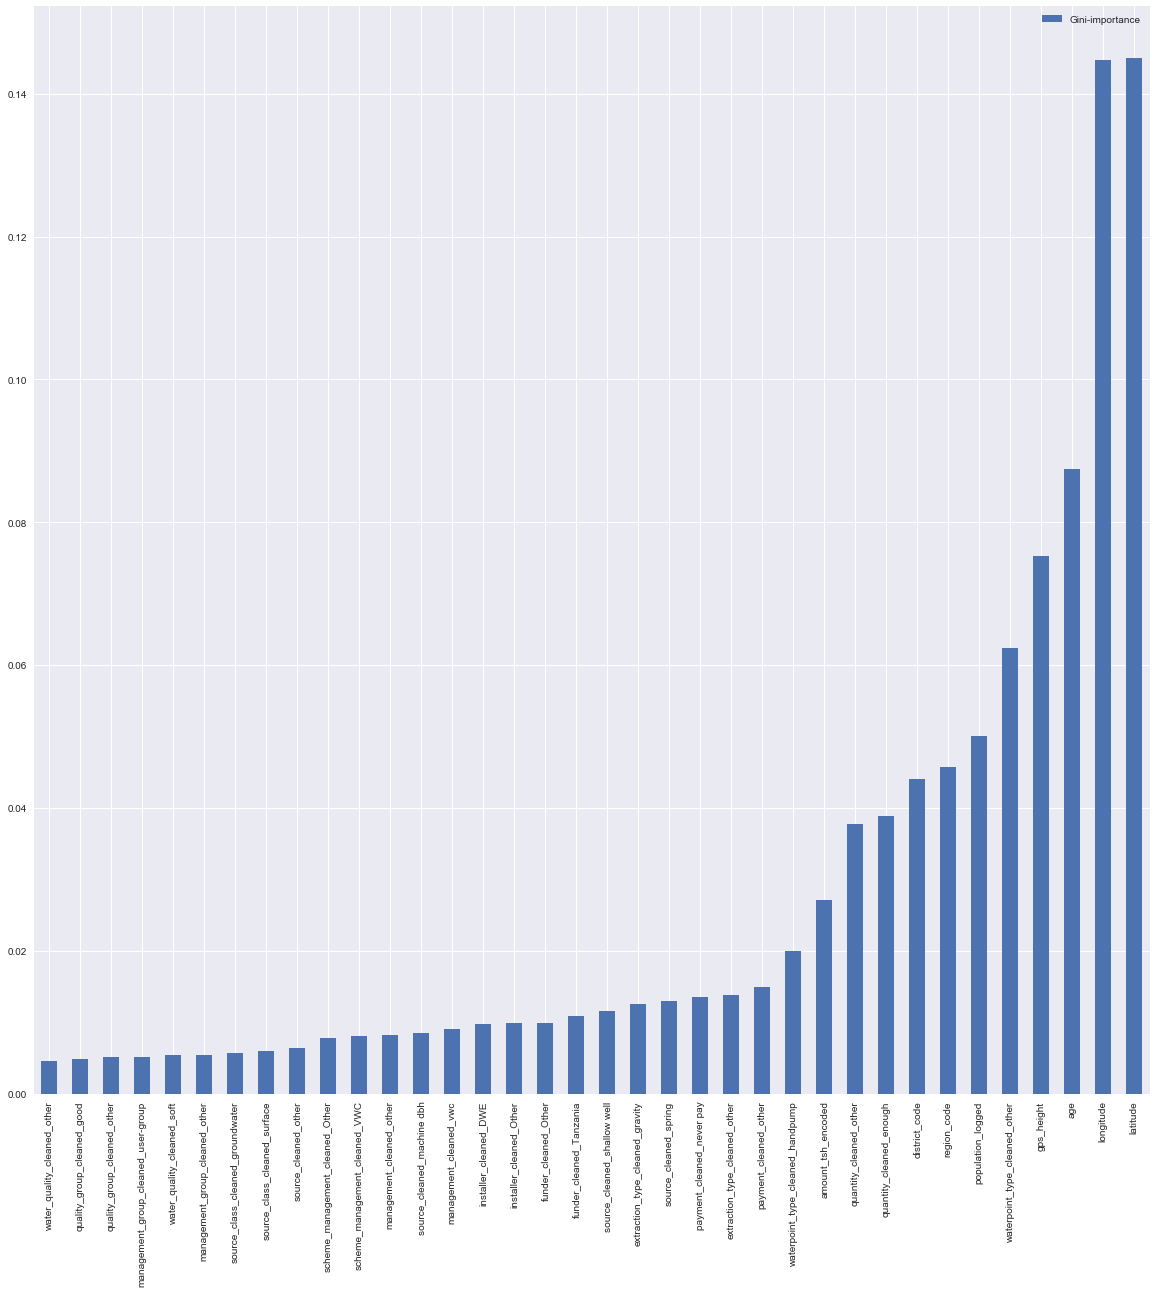

In [69]:
"""
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar')
"""
plt.style.use('seaborn')
#fig, ax = plt.subplot(figsize=(12, 8))
feats = {}
for feature, importance in zip(feature_names, rf.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(20, 20))


# RandomForest Features Importances Coefficients

In [70]:
# RandomForestClassifier Feature Importances

feature_importances = importances.sort_values(by='Gini-importance')
feature_importances

,Gini-importance
water_quality_cleaned_other,0.004552
quality_group_cleaned_good,0.004836
quality_group_cleaned_other,0.005179
management_group_cleaned_user-group,0.005181
water_quality_cleaned_soft,0.005390
management_group_cleaned_other,0.005396
source_class_cleaned_groundwater,0.005689
source_class_cleaned_surface,0.006018
source_cleaned_other,0.006333
scheme_management_cleaned_Other,0.007768


In [71]:
train_labels_copy.head()

,id,status_group,two_class
0,69572,functional,functional
1,8776,functional,functional
2,34310,functional,functional
3,67743,non functional,non functional
4,19728,functional,functional


In [72]:
train_labels_copy['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [73]:
status_group_num = []

for row in train_labels_copy['status_group']:
    if row == 'functional':
        status_group_num.append(0)
    elif row == 'functional needs repair':
        status_group_num.append(1)
    else:
        status_group_num.append(2)
        
train_labels_copy['status_group_num'] = status_group_num
train_labels_copy.head()

,id,status_group,two_class,status_group_num
0,69572,functional,functional,0
1,8776,functional,functional,0
2,34310,functional,functional,0
3,67743,non functional,non functional,2
4,19728,functional,functional,0


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr, X, y, cv=5)

y_pred = lr.predict(X_test)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))


/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/lib/python3.6/site-packages/skl

CV scores: [0.66315967 0.65970878 0.66271044 0.67020202 0.66635797]
CV scores mean: 0.6644277752104382


In [75]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

In [76]:
print(lr.classes_)

['functional' 'functional needs repair' 'non functional']


# LogisticRegression Coefficients

In [77]:
# LogisticRegression Coefficients
# 0 = functional
# 1 = functional but needs repair
# 2 = non functional

coefficients

,0,0,1,2
0,gps_height,-0.000110,-0.000304,0.000206
1,longitude,0.011597,-0.044987,0.015651
2,latitude,0.039037,0.027732,-0.046969
3,region_code,-0.012121,0.010621,0.009522
4,district_code,0.007436,-0.015543,-0.004557
5,age,-0.032530,0.009005,0.032941
6,population_logged,-0.018606,0.054199,0.003206
7,amount_tsh_encoded,0.557367,0.069837,-0.718250
8,funder_cleaned_Other,0.115052,-0.171932,-0.168378
9,funder_cleaned_Tanzania,-0.032894,0.001137,-0.114029


# LogisticRegression Coefficients Plot:
### Red: Non-Functional
### Blue: Functional
### Green: Functional Needs Repair
## Some factors important for differentiating functional and non-functional waterpoints:
1. waterpoint_type: **handpump**
2. water_source: **spring**
3. quanitity: **enough**
4. extraction_type: **gravity**

Text(0,0.5,'Coefficient magnitude')

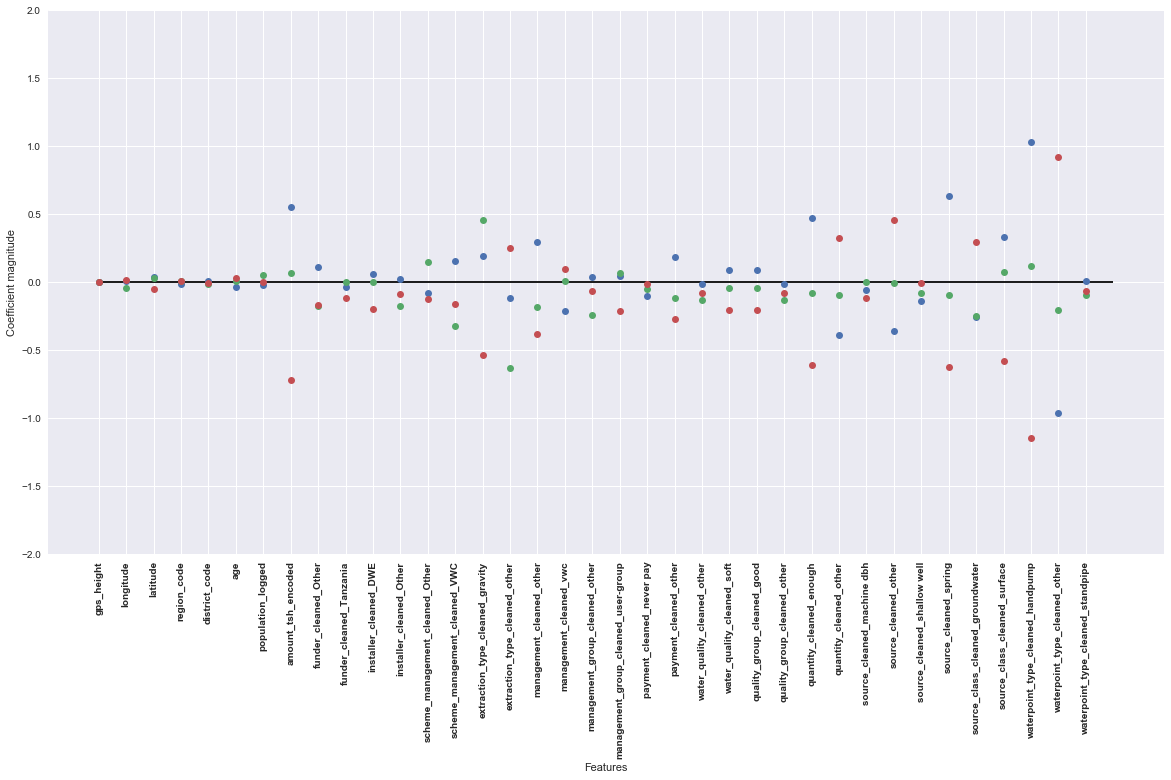

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(lr.coef_.T, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontweight='bold')
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_features=6).fit(X_train, y_train)
scores = cross_val_score(rf, X, y, cv=5)

In [80]:
print(scores)

[0.78587661 0.78234155 0.78156566 0.77929293 0.77731941]


In [81]:
# rf_two_classes

X_test = df_test.drop('id', axis=1)
final_preds = rf_two_classes.predict(X_test)

kaggle_baseline_submission_9 = pd.DataFrame({'id': df_test.id, 'status_group': final_preds})
kaggle_baseline_submission_9.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [82]:
kaggle_baseline_submission_9.to_csv('kagle_baseline_submission_9.csv', index=False)

In [83]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe
